# Maximization Bias Example

 The small MDP shown inset in Figure 6.5 provides a simple example of how maximization bias can harm the performance of TD control algorithms.
 - The MDP has 2 non-terminal states: $A$ and $B$.
 - Episodes always start in $A$ with a choice between 2 actions: $left$ and $right$.
   - The $right$ action transitions immediately to the terminal state with a reward and return of 0.
   - The $left$ action transitions to $B$, also with a reward of 0, from which there are many possible actions all of which cause immediate termination with a reward drawn from a normal distribution with $\mu=-0.1$ mean and $\sigma=1.0$ variance.
 - Thus, the expected return for any trajectory starting with $left$ is -0.1, and thus taking $left$ in state $A$ is always a mistake. 
 - Nevertheless, our control methods may favor $left$ because of maximization bias making $B$ appear to have a positive value.


In [1]:
from IPython.display import Image

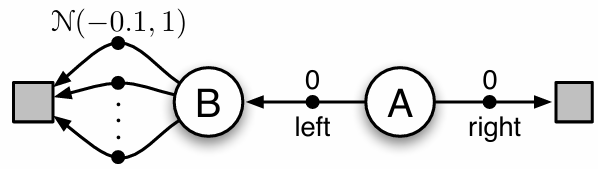

In [2]:
Image(filename="../book_images/Figure_6_5_mdp.PNG")

 - Figure 6.5 shows that Q-learning with $\varepsilon$-greedy action selection initially learns to strongly favor the $left$ action on this example. 
 - Even at asymptote, Q-learning takes the $left$ action about 5% more often than is optimal at our parameter settings ($\varepsilon=0.1, \alpha=0.1, \gamma=1$).

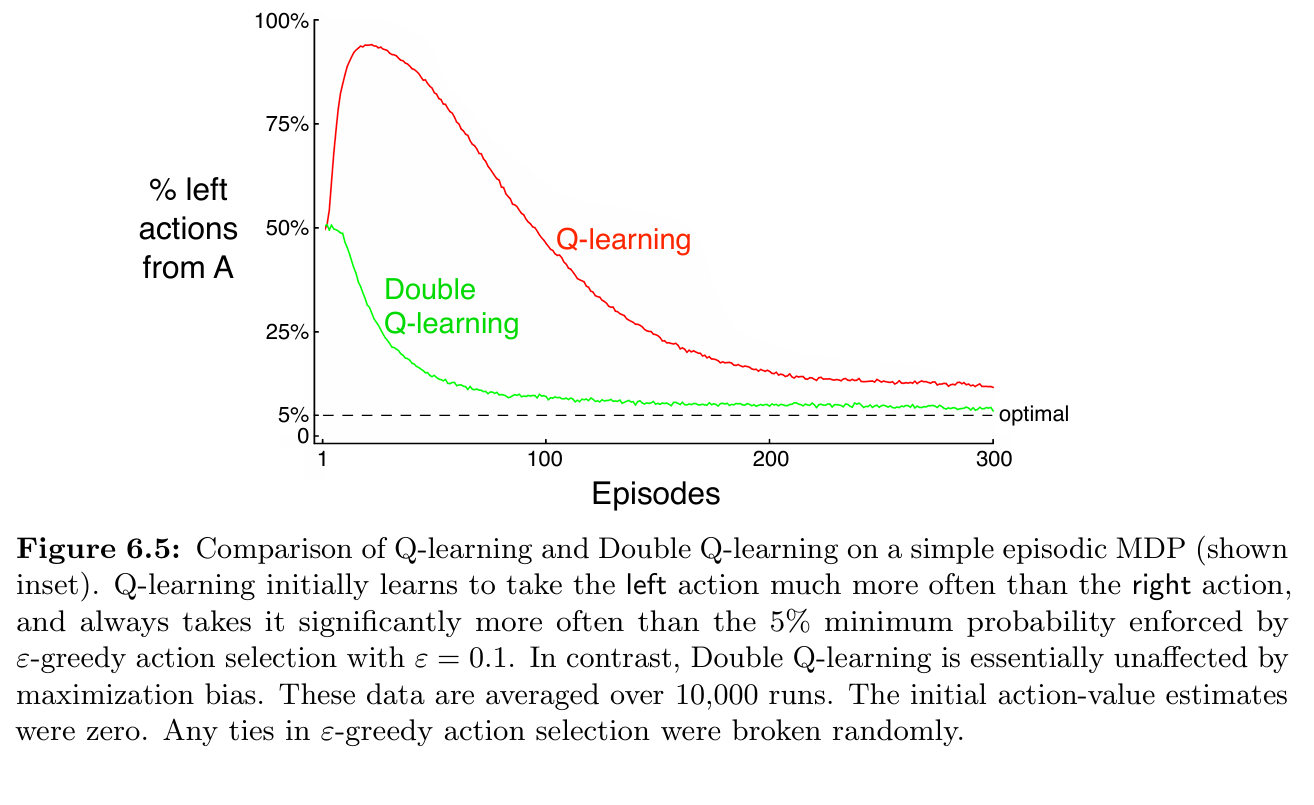

In [3]:
Image(filename="../book_images/Figure_6_5_graph.PNG")

In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from tqdm import tqdm
import copy

matplotlib.use('Agg')

In [ ]:
from src.maximization_bias import state_action_values, q_learning

In [ ]:
# Number of independent runs
runs = 1000

# Number of episodes in each run
episodes = 300

In [ ]:
# Number of action "left" in state A for Q-learning
left_counts_q = np.zeros((runs, episodes))

# Number of action "left" in state A for Double Q-learning
left_counts_double_q = np.zeros((runs, episodes))

In [ ]:
for run in tqdm(range(runs)):
    # Get the action-value estimates for Q-learning and Double Q-learning
    action_value_estimates = copy.deepcopy(state_action_values)
    first_action_value_estimates = copy.deepcopy(state_action_values)
    second_action_value_estimates = copy.deepcopy(state_action_values)
    
    for episode in range(episodes):
        # Get the number of "left" action for Q-learning
        left_counts_q[run, episode] = q_learning(action_value_estimates)
        
        # Get the number of "left" action for Double Q-learning
        left_counts_double_q[run, episode] = q_learning(first_action_value_estimates, second_action_value_estimates)

In [ ]:
# Calculate mean values
left_counts_q = left_counts_q.mean(axis=0)
left_counts_double_q = left_counts_double_q.mean(axis=0)

In [ ]:
# Plotting
plt.plot(left_counts_q, label="Q-learning")
plt.plot(left_counts_double_q, label="Double Q-learning")
plt.plot(np.ones(episodes) * 0.05, label="Optimal", linestyle="--")
plt.yticks([0.05, 0.2, 0.4, 0.6, 0.8, 1.0])

In [ ]:
plt.xlabel("Episodes")
plt.ylabel("% left actions from A")
plt.legend()

In [ ]:
plt.savefig("../generated_images/figure_6_5.png")
plt.close()